## Ronan Jasper G. Reponte
 
## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### Exploratory Data Analysis and Visualization
---
- Perform EDA and explain each graph

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Suppress the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

# Display basic information about the dataset
print(df.info())

# Display basic statistical details of the dataset
print(df.describe())

# Display the column names
print(df.columns)

# Display the resulting DataFrame
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.68976

### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

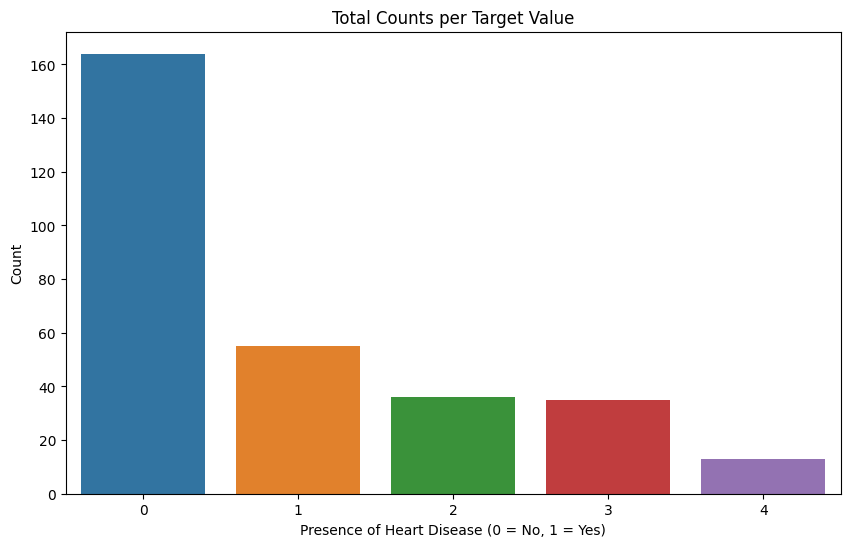

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:

# Create a bar plot showing the total counts per target value
plt.figure(figsize=(10, 6))
sns.countplot(x='num', data=df)
plt.title('Total Counts per Target Value')
plt.xlabel('Presence of Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
df.head()

### Distribution of the Target Variable (num)

The bar graph of the target variable (num) reveals the following insights:

- **num = 0**: Represents the majority class, indicating most patients in the dataset do not have heart disease.
- **num = 1, 2, 3**: Have similar counts, suggesting a balanced distribution among these categories.
- **num = 4**: Has the fewest count, indicating it is the least common severity level of heart disease in the dataset.

This distribution highlights an imbalance, with a predominance of patients without heart disease and fewer patients with severe heart conditions.

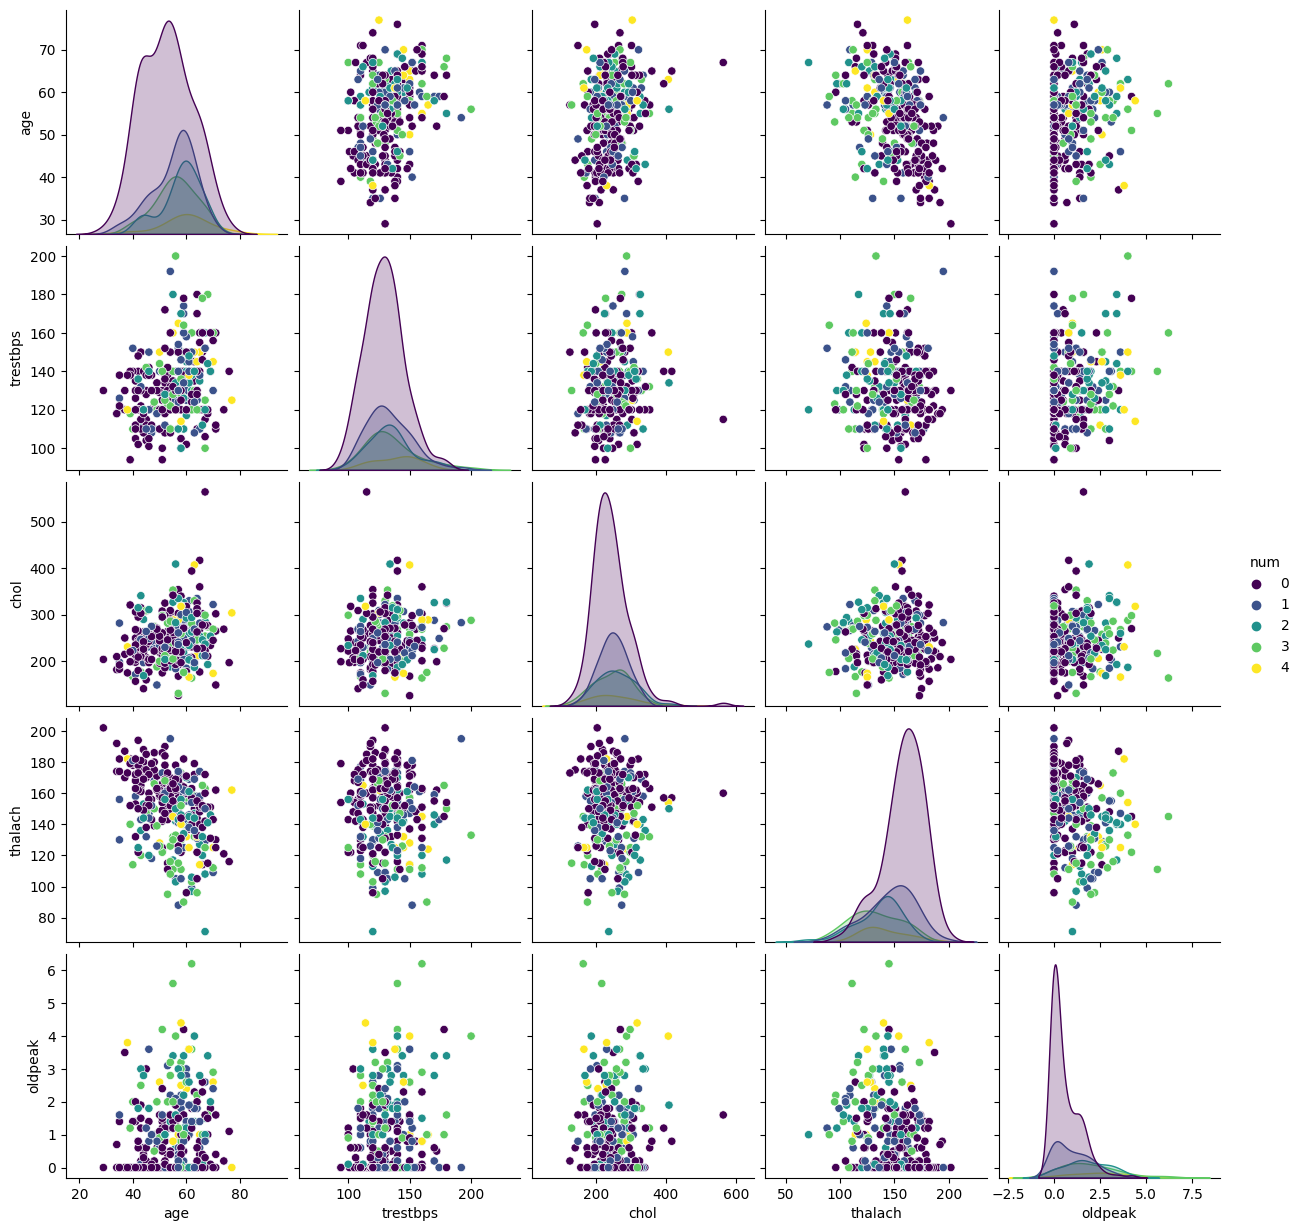

In [4]:
#  NOTE: instruction was concatenated so I decided to use the age, trestbps, chol, thalach, oldpeak column, and num cols
import seaborn as sns
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Select subset of columns for pairplot
columns_to_include = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num']

# Create pairplot
sns.pairplot(df[columns_to_include], hue='num', palette='viridis')
plt.show()

Age appears to have a weakly positive relationship with both maximum heart rate (thalach) and resting blood pressure (trestbps). This means that as you become older, your maximum heart rate and resting blood pressure will rise slightly.
There does not appear to be a direct relationship between thal (a variable related to the kind of heart defect) and either serum cholesterol (chol) or maximal heart rate (thalach).
Similarly, the plot does not show a clear link between thal and resting blood pressure (trestbps).

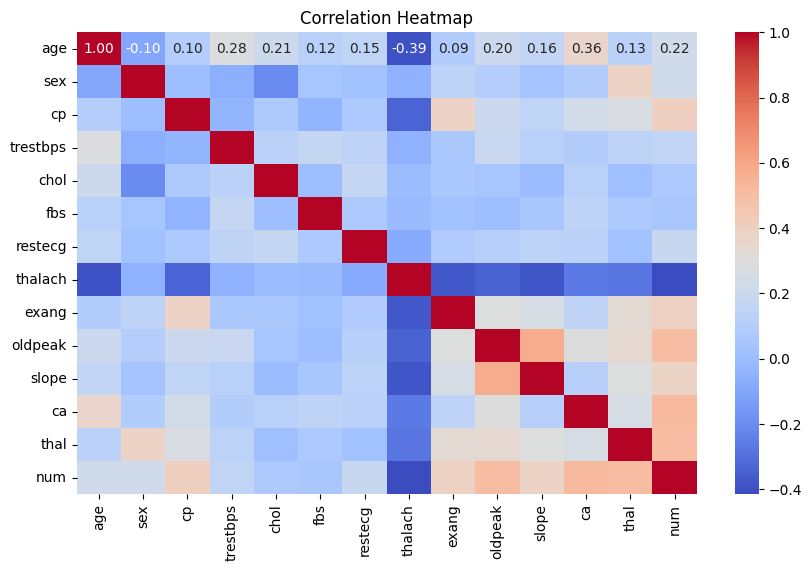

In [5]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The number of heart disease a person have is a medium positive correlation with thal, ca, oldpeak, exang, slope, and cp <br>
Age has a slight positive connection with both resting blood pressure (trestbps) and maximal heart rate (thalach). Additionally, there is a modest positive association between resting blood pressure (trestbps) and serum cholesterol (chol). Furthermore, there is a modest negative connection between the slope of the peak exercise ST segment (slope) and maximum heart rate (thalach). Finally, a weak positive association has been found between the number of main vessels (ca) and the presence of cardiac illness (num). Correlation should not be mistaken with causation.

# Modeling Task

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [6]:
# Separate features (X) and labels (y)
y = df['num']
X = df.drop(columns=['num'])

**TASK: Perform a train test split on the data, with the test size of 5% and a random_state of 0.**

In [7]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data.**

In [8]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# Create StandardScaler object
scaler = StandardScaler()

# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Find rows with NaN values in X_train_scaled
nan_indices = np.isnan(X_train_scaled).any(axis=1)

# Filter out rows with NaN values
X_train_scaled_clean = X_train_scaled[~nan_indices]
y_train_clean = y_train[~nan_indices]

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Create a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Create a GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled_clean, y_train_clean)

# Get the best model
best_log_reg = grid_search.best_estimator_

# Predict on the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model
print("Best C value:", grid_search.best_params_['C'])

Best C value: 0.1


### Coeffecients

**TASK: Report back the model's coefficients.**

In [10]:
# Get the coefficients of the logistic regression model
coefficients = best_log_reg.coef_

# Print the coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, coefficients[0]):
    print(f"{feature}: {coef}")

Model Coefficients:
age: -0.04821145830978801
sex: -0.25427001133215754
cp: -0.3881030859521847
trestbps: -0.21922426860468114
chol: -0.19179566678283463
fbs: 0.16264674896622897
restecg: -0.12468741704916728
thalach: 0.2552602889515167
exang: -0.2963521156339414
oldpeak: -0.346014280367136
slope: -0.2630480372975846
ca: -0.7174220498792041
thal: -0.5692064848763249


**Task: Create a visualization of the coefficients.**

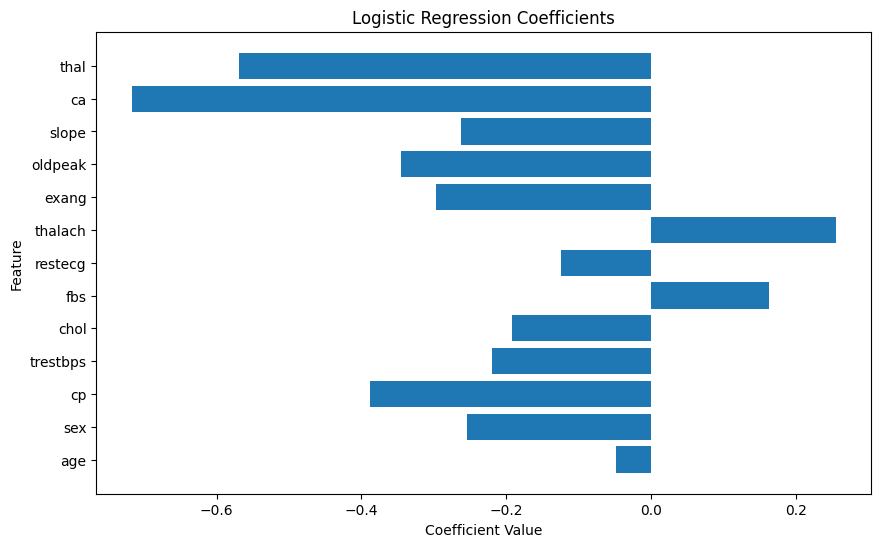

In [11]:
import matplotlib.pyplot as plt

# Get the coefficients of the logistic regression model
coefficients = best_log_reg.coef_[0]

# Get the feature names
feature_names = X.columns

# Create a bar plot of the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

---------

## Model Performance Evaluation

**TASK: Evaluate your model on the remaining 5% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

Confusion Matrix:
 [[5 1 1 0]
 [2 1 1 0]
 [2 0 0 1]
 [0 1 1 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.33      0.25      0.29         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2

    accuracy                           0.38        16
   macro avg       0.22      0.24      0.23        16
weighted avg       0.33      0.38      0.34        16



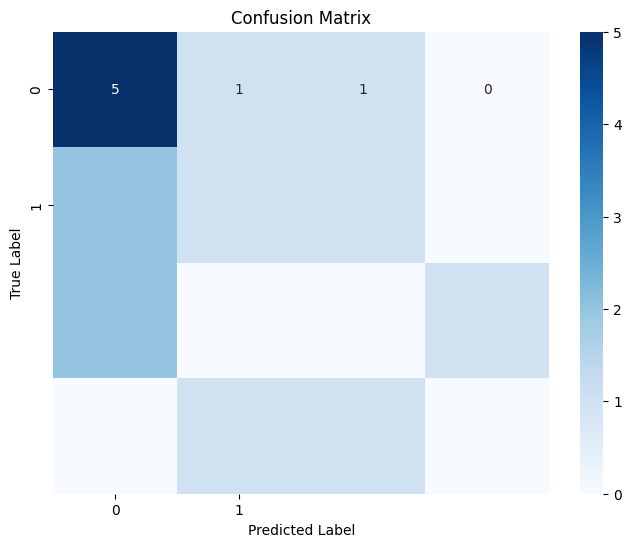

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Generate the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

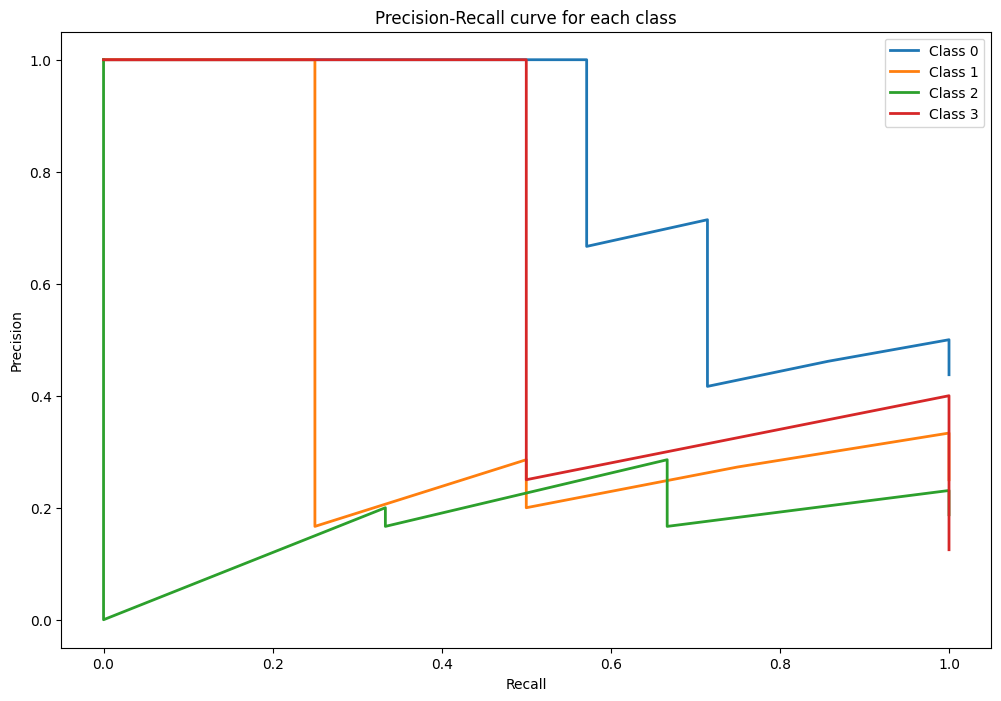

In [14]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Compute precision-recall curve and plot for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], best_log_reg.predict_proba(X_test_scaled)[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for each class')
plt.legend(loc="best")
plt.show()

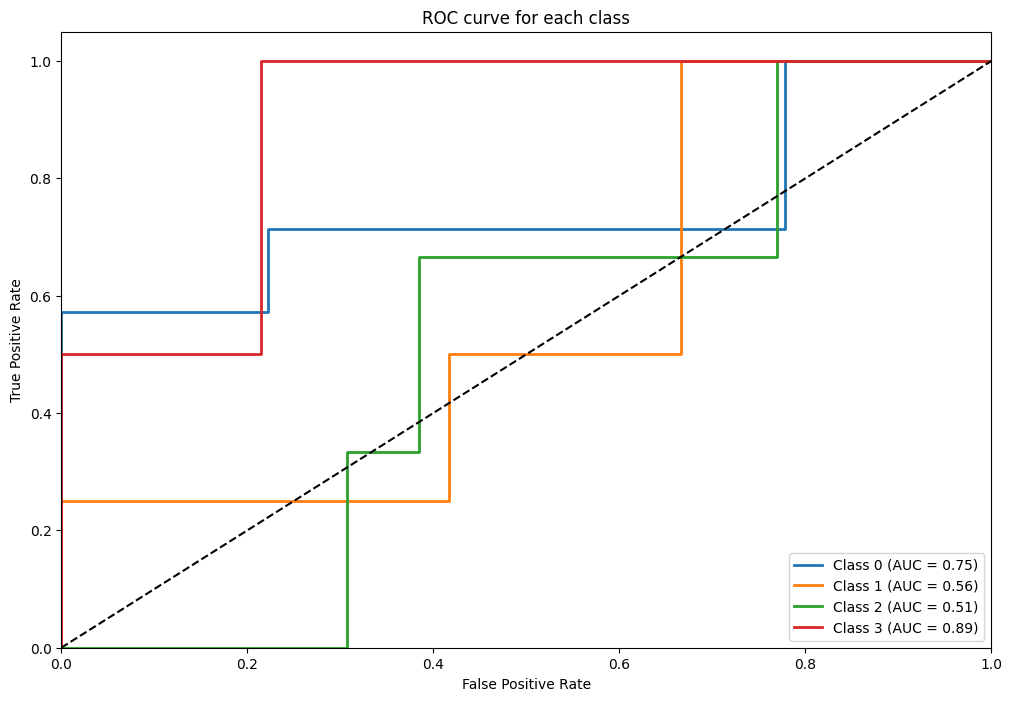

In [15]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], best_log_reg.predict_proba(X_test_scaled)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for each class')
plt.legend(loc="best")
plt.show()
